In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
n=10000
a=torch.ones([n])
b=torch.ones([n])

In [3]:
class Timer:
    def __init__(self):
        self.times=[]
        self.start()
    def start(self):
        #启动定时器
        self.tik=time.time()  #起始时间
    def stop(self):
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        return sum(self.times)/len(self.times)
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()
    

In [8]:
c=torch.zeros([n])
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f}sec'


'0.06900sec'

In [16]:
timer.start()
d=a+b
f'{timer.stop():.5f}sec'

'0.00000sec'

In [20]:
#正态分布/平方损失
def normal(x,mu,sigma):
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-(x-mu)**2/(2*sigma**2))


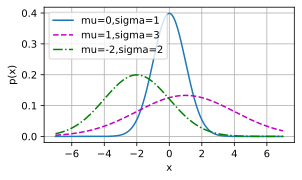

In [21]:
x=np.arange(-7,7,0.01)
#定义mu、sigma
params=[(0,1),(1,3),(-2,2)]
y=[normal(x,mu,sigma) for mu,sigma in params]
d2l.plot(x,y,xlabel='x',ylabel='p(x)',figsize=(4.5,2.5),
        legend=[f'mu={mu},sigma={sigma}' for mu,sigma in params])  #legend：标记曲线